## Attempting to reverse engineer

In [4]:
directory = 'D:\dev\SAR\SAR2SAR\SAR2SAR\\test_data'

In [5]:
from glob import glob

test_files = glob((directory+'/*.npy').format('float32'))

In [6]:
test_files

['D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\196488331_HH.tif.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\lely.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\lely_1.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\lely_2.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\lely_3.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\lely_4.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\lely_5.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\limagne_1.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\limagne_2.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\limagne_3.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\limagne_4.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\limagne_5.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\marais1.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\marais1_1.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\marais1_2.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_data\\marais1_3.npy',
 'D:\\dev\\SAR\\SAR2SAR\\SAR2SAR\\test_

In [7]:
from scipy import special
from PIL import Image
import numpy as np

# DEFINE PARAMETERS OF SPECKLE AND NORMALIZATION FACTOR
M = 10.089038980848645
m = -1.429329123112601
L = 1
c = (1 / 2) * (special.psi(L) - np.log(L))
cn = c / (M - m)  # normalized (0,1) mean of log speckle

def normalize_sar(im):
    return ((np.log(im + np.spacing(1)) - m) * 255 / (M - m)).astype('float32')

def denormalize_sar(im):
    return np.exp((M - m) * np.clip((np.squeeze(im)).astype('float32'),0,1) + m)

def load_sar_images(filelist):
    if not isinstance(filelist, list):
        im = np.load(filelist)
        im = normalize_sar(im)
        return np.array(im).reshape(1, np.size(im, 0), np.size(im, 1), 1)
    data = []
    for file in filelist:
        im = np.load(file)
        im = normalize_sar(im)
        data.append(np.array(im).reshape(1, np.size(im, 0), np.size(im, 1), 1))
    return data

def store_data_and_plot(im, threshold, filename):
    im = np.clip(im, 0, threshold)
    im = im / threshold * 255
    im = Image.fromarray(im.astype('float64')).convert('L')
    im.save(filename.replace('npy','png'))

def save_sar_image(noisy, imagename, save_dir):
    choices = {'marais1':190.92, 'marais2': 168.49, 'saclay':470.92,
        'lely':235.90, 'ramb':167.22, 'risoul':306.94, 'limagne':178.43}
    threshold = np.mean(noisy)+3*np.std(noisy)
    for x in choices:
        if x in imagename:
            threshold = choices.get(x)

    filename = save_dir + "\\" + imagename
    #np.save(filename, noisy)
    store_data_and_plot(noisy, threshold, filename)

In [8]:
import os

save_dir = 'D:\dev\SAR\SAR2SAR\SAR2SAR\\temp'

if not(os.path.exists(save_dir)):
    os.mkdir(save_dir)

for idx in range(len(test_files)):
    real_image = load_sar_images(test_files[idx]).astype(np.float32) / 255.0
    noisyimage = denormalize_sar(real_image)
    
    imagename = test_files[idx].replace(directory+"\\", "")
    
    save_sar_image(noisyimage, imagename, save_dir)
    
    

## Image to np (Reverse Engineering)

In [29]:
# Original

orig_img = 'D:\dev\SAR\SAR2SAR\SAR2SAR\\test_data\\lely.npy'
Original = np.load(orig_img)

Original

array([[81.21993782, 58.69940716, 80.3397685 , ..., 67.25590096,
        35.55975288, 25.39670403],
       [44.12464853, 36.57726653, 23.19817862, ..., 47.27547718,
        78.99876649, 86.07400969],
       [53.41426149, 82.64074302, 51.89143336, ..., 95.45087684,
        89.53626689, 87.67590935],
       ...,
       [26.86216837, 56.15499596, 25.66070658, ..., 42.68320203,
        28.67848174, 15.155295  ],
       [29.76722602, 55.95200694, 29.50177033, ..., 17.34771114,
        27.60819592, 29.78009096],
       [45.67563045, 14.24241902, 33.9111468 , ...,  5.98193842,
        48.88074434, 60.84519672]])

In [32]:
test_img = 'D:\dev\SAR\SAR2SAR\SAR2SAR\\temp\\lely.png'

I = np.asarray(Image.open(test_img))
threshold = np.mean(I)+3*np.std(I)
I = I / threshold * 255
I = np.clip(I, 0, threshold)
I

array([[76.34369044, 55.28336205, 75.46617676, ..., 63.18098519,
        33.34551996, 23.69286945],
       [41.24314311, 34.22303365, 21.93784208, ..., 44.75319785,
        74.58866308, 81.60877254],
       [50.01827995, 78.09871781, 49.14076626, ..., 90.38390938,
        84.24131359, 82.48628623],
       ...,
       [25.44789681, 52.650821  , 23.69286945, ..., 40.36562943,
        27.20292418, 14.04021893],
       [28.08043786, 52.650821  , 27.20292418, ..., 15.7952463 ,
        25.44789681, 28.08043786],
       [42.99817048, 13.16270525, 31.5904926 , ...,  5.2650821 ,
        45.63071153, 57.03838941]])

In [33]:
# Save npy file

np.save(test_img.replace('png','npy'), I)

In [34]:
# try reopening

test_npy = 'D:\dev\SAR\SAR2SAR\SAR2SAR\\temp\\lely.npy'

check = np.load(test_npy)
check

array([[76.34369044, 55.28336205, 75.46617676, ..., 63.18098519,
        33.34551996, 23.69286945],
       [41.24314311, 34.22303365, 21.93784208, ..., 44.75319785,
        74.58866308, 81.60877254],
       [50.01827995, 78.09871781, 49.14076626, ..., 90.38390938,
        84.24131359, 82.48628623],
       ...,
       [25.44789681, 52.650821  , 23.69286945, ..., 40.36562943,
        27.20292418, 14.04021893],
       [28.08043786, 52.650821  , 27.20292418, ..., 15.7952463 ,
        25.44789681, 28.08043786],
       [42.99817048, 13.16270525, 31.5904926 , ...,  5.2650821 ,
        45.63071153, 57.03838941]])

# Attempt on my TIFF image

In [2]:
from PIL import Image
import numpy as np

test_img = 'D:\\dev\\SAR\\196488331_HH.tif'
Image.MAX_IMAGE_PIXELS = None

In [3]:
I = np.asarray(Image.open(test_img))

In [4]:
threshold = np.mean(I)+3*np.std(I)

I = I / threshold * 255
I = np.clip(I, 0, threshold)

threshold

260.7408791951479

In [5]:
np.save('test'+'.npy', I)

In [9]:
I

array([[ 84.10648943,  66.5028056 ,  95.84227865, ...,  83.12850699,
          8.80184192,  11.73578922],
       [101.71017326,  88.01841917,  76.28262995, ..., 118.33587466,
         29.33947306, 100.73219083],
       [ 10.75780679, 105.62210301,  16.6257014 , ...,  50.85508663,
        146.69736528, 100.73219083],
       ...,
       [ 65.52482316,  47.92113933,  52.8110515 , ..., 132.02762876,
         19.5596487 ,  48.89912176],
       [ 61.61289342,  40.09727984,  22.49359601, ..., 105.62210301,
         48.89912176,  94.86429622],
       [ 31.29543793,   4.88991218,   8.80184192, ...,  72.37070021,
         37.16333254,  35.20736767]])

## Attempt to make image again

In [23]:
from matplotlib.pyplot import imshow
%matplotlib inline

def store_data_and_plot(im, threshold, filename):
    im = np.clip(im, 0, threshold)
    im = im / threshold * 255
    im = Image.fromarray(im.astype('float64')).convert('L')
    imshow(np.asarray(im))
    im.save(filename, 'PNG')

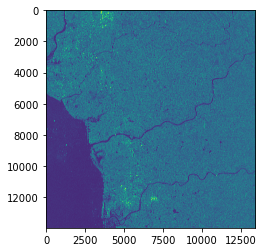

In [28]:
fname = 'D:\dev\SAR\SAR2SAR\\temp\\test.png'

store_data_and_plot(I, threshold, fname)

In [14]:
from matplotlib.pyplot import imshow

imshow(np.asarray(pil_im))

In [27]:
import os
os.getcwd().append(temp)

AttributeError: 'str' object has no attribute 'append'